In [ ]:
from google.colab import drive 
drive.mount('/content/drive',force_remount=True)
import os
# This path will change on your drive
# Add shortcut of folder 'IEOR 235' to your drive and copy the path of folder 'MVP!!!' 
# (use 'Files' button on the left)
noteboook_path = '/content/drive/MyDrive/281A' # GQ
os.chdir(noteboook_path)

Mounted at /content/drive


# Data Processing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('2017.csv')
df = df.append(pd.read_csv('2018.csv'))
df = df.append(pd.read_csv('2019.csv'))
df = df.append(pd.read_csv('2020.csv'))
df = df.append(pd.read_csv('2021.csv'))

In [ ]:
df = df.drop(['Unnamed: 8'],axis=1)

In [ ]:
df = df[df['CANCELLED']==0]
df = df[df['DIVERTED']==0]
df = df[df['ORIGIN']=='SFO']

In [ ]:
df

,DAY_OF_WEEK,FL_DATE,ORIGIN,CRS_DEP_TIME,DEP_DEL15,CANCELLED,DIVERTED,DISTANCE
219,1,2017-01-02,SFO,1545,1.0,0.0,0.0,1464.0
220,1,2017-01-09,SFO,1545,1.0,0.0,0.0,1464.0
221,1,2017-01-16,SFO,1545,0.0,0.0,0.0,1464.0
222,1,2017-01-23,SFO,1545,0.0,0.0,0.0,1464.0
223,1,2017-01-30,SFO,1545,0.0,0.0,0.0,1464.0
...,...,...,...,...,...,...,...,...
361191,7,2021-01-31,SFO,605,0.0,0.0,0.0,1855.0
361192,7,2021-01-31,SFO,1600,0.0,0.0,0.0,651.0
361193,7,2021-01-31,SFO,1050,0.0,0.0,0.0,651.0
361194,7,2021-01-31,SFO,1500,1.0,0.0,0.0,447.0


In [ ]:
np.mean(df['DEP_DEL15'])

0.20140809228942233

In [ ]:
grouped = df.groupby(['FL_DATE'])
count = grouped['FL_DATE'].count()

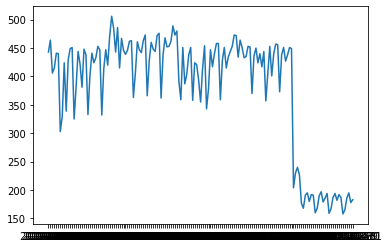

In [ ]:
x = count.index.to_list()
y = count.values.tolist()
plt.plot(x,y)

In [ ]:
tempr = pd.read_csv('Temperature.csv') 

In [ ]:
tempr

,DATE,TEMP,DEWP,SLP,STP,VISIB,WDSP,MXSPD,GUST,MAX,MIN,PRCP
0,1/1/2017,50.7,38.8,1014.1,13.3,10.0,12.0,20.0,28.9,54.0,44.1,0.00
1,1/2/2017,47.4,39.5,1015.6,14.9,9.8,7.9,19.0,999.9,54.0,44.1,0.05
2,1/3/2017,49.9,44.6,1016.9,16.5,8.5,8.0,17.1,22.9,53.1,44.1,0.26
3,1/4/2017,55.5,51.2,1012.9,12.2,7.5,15.5,33.0,42.9,59.0,48.0,0.75
4,1/5/2017,48.1,39.5,1016.1,15.4,8.6,7.1,14.0,999.9,59.0,44.1,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...
1797,12/3/2021,54.1,50.2,1019.3,18.7,6.0,5.2,15.0,999.9,62.1,48.9,0.00
1798,12/4/2021,54.9,47.6,1021.4,20.8,9.8,2.9,11.1,999.9,57.9,51.1,0.00
1799,12/5/2021,53.2,48.6,1024.7,24.0,9.0,6.0,15.0,999.9,57.9,51.1,0.00
1800,12/6/2021,53.0,49.4,1021.1,20.6,6.0,4.7,15.0,999.9,57.9,48.9,0.00


In [ ]:
import datetime
tempr['DATE'] = tempr['DATE'].apply(lambda x: datetime.datetime.strptime(x,"%m/%d/%Y"))
#dc = tempr['DATE'].strftime("%Y-%m-%d")
#print(dc,type(dc))

In [ ]:
tempr

,DATE,TEMP,DEWP,SLP,STP,VISIB,WDSP,MXSPD,GUST,MAX,MIN,PRCP
0,2017-01-01,50.7,38.8,1014.1,13.3,10.0,12.0,20.0,28.9,54.0,44.1,0.00
1,2017-01-02,47.4,39.5,1015.6,14.9,9.8,7.9,19.0,999.9,54.0,44.1,0.05
2,2017-01-03,49.9,44.6,1016.9,16.5,8.5,8.0,17.1,22.9,53.1,44.1,0.26
3,2017-01-04,55.5,51.2,1012.9,12.2,7.5,15.5,33.0,42.9,59.0,48.0,0.75
4,2017-01-05,48.1,39.5,1016.1,15.4,8.6,7.1,14.0,999.9,59.0,44.1,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...
1797,2021-12-03,54.1,50.2,1019.3,18.7,6.0,5.2,15.0,999.9,62.1,48.9,0.00
1798,2021-12-04,54.9,47.6,1021.4,20.8,9.8,2.9,11.1,999.9,57.9,51.1,0.00
1799,2021-12-05,53.2,48.6,1024.7,24.0,9.0,6.0,15.0,999.9,57.9,51.1,0.00
1800,2021-12-06,53.0,49.4,1021.1,20.6,6.0,4.7,15.0,999.9,57.9,48.9,0.00


In [ ]:
df['FL_DATE'] = df['FL_DATE'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

In [ ]:
df = pd.merge(df,tempr,left_on = 'FL_DATE',right_on = 'DATE')

In [ ]:
df

,DAY_OF_WEEK,FL_DATE,ORIGIN,CRS_DEP_TIME,DEP_DEL15,CANCELLED,DIVERTED,DISTANCE,DATE,TEMP,DEWP,SLP,STP,VISIB,WDSP,MXSPD,GUST,MAX,MIN,PRCP
0,1,2017-01-02,SFO,1545,1.0,0.0,0.0,1464.0,2017-01-02,47.4,39.5,1015.6,14.9,9.8,7.9,19.0,999.9,54.0,44.1,0.05
1,1,2017-01-02,SFO,2205,0.0,0.0,0.0,2521.0,2017-01-02,47.4,39.5,1015.6,14.9,9.8,7.9,19.0,999.9,54.0,44.1,0.05
2,1,2017-01-02,SFO,905,0.0,0.0,0.0,651.0,2017-01-02,47.4,39.5,1015.6,14.9,9.8,7.9,19.0,999.9,54.0,44.1,0.05
3,1,2017-01-02,SFO,1945,1.0,0.0,0.0,354.0,2017-01-02,47.4,39.5,1015.6,14.9,9.8,7.9,19.0,999.9,54.0,44.1,0.05
4,1,2017-01-02,SFO,2130,1.0,0.0,0.0,2586.0,2017-01-02,47.4,39.5,1015.6,14.9,9.8,7.9,19.0,999.9,54.0,44.1,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58940,7,2021-01-31,SFO,605,0.0,0.0,0.0,1855.0,2021-01-31,54.6,44.2,1021.2,20.4,10.0,2.6,7.0,999.9,61.0,46.9,0.00
58941,7,2021-01-31,SFO,1600,0.0,0.0,0.0,651.0,2021-01-31,54.6,44.2,1021.2,20.4,10.0,2.6,7.0,999.9,61.0,46.9,0.00
58942,7,2021-01-31,SFO,1050,0.0,0.0,0.0,651.0,2021-01-31,54.6,44.2,1021.2,20.4,10.0,2.6,7.0,999.9,61.0,46.9,0.00
58943,7,2021-01-31,SFO,1500,1.0,0.0,0.0,447.0,2021-01-31,54.6,44.2,1021.2,20.4,10.0,2.6,7.0,999.9,61.0,46.9,0.00


In [ ]:
df = df.drop(['DATE'],axis=1)
df = df.drop(['CANCELLED','DIVERTED'],axis=1)

In [ ]:
df = df.drop(['ORIGIN'],axis=1)

In [ ]:
df

,DAY_OF_WEEK,FL_DATE,CRS_DEP_TIME,DEP_DEL15,DISTANCE,TEMP,DEWP,SLP,STP,VISIB,WDSP,MXSPD,GUST,MAX,MIN,PRCP
0,1,2017-01-02,1545,1.0,1464.0,47.4,39.5,1015.6,14.9,9.8,7.9,19.0,999.9,54.0,44.1,0.05
1,1,2017-01-02,2205,0.0,2521.0,47.4,39.5,1015.6,14.9,9.8,7.9,19.0,999.9,54.0,44.1,0.05
2,1,2017-01-02,905,0.0,651.0,47.4,39.5,1015.6,14.9,9.8,7.9,19.0,999.9,54.0,44.1,0.05
3,1,2017-01-02,1945,1.0,354.0,47.4,39.5,1015.6,14.9,9.8,7.9,19.0,999.9,54.0,44.1,0.05
4,1,2017-01-02,2130,1.0,2586.0,47.4,39.5,1015.6,14.9,9.8,7.9,19.0,999.9,54.0,44.1,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58940,7,2021-01-31,605,0.0,1855.0,54.6,44.2,1021.2,20.4,10.0,2.6,7.0,999.9,61.0,46.9,0.00
58941,7,2021-01-31,1600,0.0,651.0,54.6,44.2,1021.2,20.4,10.0,2.6,7.0,999.9,61.0,46.9,0.00
58942,7,2021-01-31,1050,0.0,651.0,54.6,44.2,1021.2,20.4,10.0,2.6,7.0,999.9,61.0,46.9,0.00
58943,7,2021-01-31,1500,1.0,447.0,54.6,44.2,1021.2,20.4,10.0,2.6,7.0,999.9,61.0,46.9,0.00


In [ ]:
df.to_csv('SFO_T.csv',index=False)